<a href="https://colab.research.google.com/github/p3dr0id/covid19oesteba/blob/main/processamento_covid19_municipios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de dados da Covid-19 nos municípios da macrorregião do oeste da Bahia**


# Tratamento e análise de dados de casos e óbitos

## Coleta e tratamento dos dados

### Importação de bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # importando a biblioteca matiplotlib para geração de gráficos
from matplotlib.ticker import MaxNLocator, AutoMinorLocator, FormatStrFormatter# para forçar que os valores do eixo sejam apenas números inteiros
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes # serve para fazer inserção de gráficos como subplots
import datetime
import pytz
import time
from google.colab import drive, auth
auth.authenticate_user()
!pip install gspread_pandas==3.0.0
import gspread
from google.auth import default
creds, _ = default()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gspread
    Found existing installation: gspread 3.4.2
    Uninstalling gspread-3.4.2:
      Successfully uninstalled gspread-3.4.2


### Importa dados do google drive e cria dataframes

In [ ]:
# Importa planilha de dados diretamente do google drive com a biblioteca gspread e cria um dataframe com a biblioteca pandas
gc = gspread.authorize(creds)
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1KcTYpDBnYSchsPHAw-MYDZJQXMDDowJG0cBPR3JDyKE/edit?usp=sharing') # A URL of your workbook.
drive.mount('drive', force_remount=True) # Monta meu google drive para salvar os dataframes e figuras
sheet1 = wb.worksheet('Casos Acumulados') # Enter your sheet name.
sheet2 = wb.worksheet('Óbitos Acumulados') # Enter your sheet name.
sheet3 = wb.worksheet('Ativos') # Enter your sheet name.
sheet4 = wb.worksheet('Recuperados') # Enter your sheet name.
sheet5 = wb.worksheet('Ocupação de Leitos') # Enter your sheet name.
df1 = sheet1.get_all_values()
df2 = sheet2.get_all_values()
df3 = sheet3.get_all_values()
df4 = sheet4.get_all_values()
df5 = sheet5.get_all_values()
df_casos = pd.DataFrame(df1)
df_obitos = pd.DataFrame(df2)
df_ativos = pd.DataFrame(df3)
df_recuperados = pd.DataFrame(df4)
df_leitos = pd.DataFrame(df5)

Mounted at drive


### Visualização do dataframe criado a partir da planilha do GTG-Covid-19 UFOB

In [ ]:
df_casos.head(37)

,0,1,2,3,4,5,6,7,8,9,...,816,817,818,819,820,821,822,823,824,825
0,Cidade,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,...,2022-06-14,2022-06-15,2022-06-16,2022-06-17,2022-06-18,2022-06-19,2022-06-20,2022-06-21,2022-06-22,2022-06-23
1,Angical,0,0,0,0,0,0,0,0,0,...,1097,1109,1109,1120,1120,1120,1120,1148,1153,1153
2,Baianópolis,0,0,0,0,0,0,0,0,0,...,1295,1295,1351,1351,1351,1351,1351,1351,1351,1351
3,Barra,0,0,0,0,0,0,0,0,0,...,3889,3889,3889,3889,3889,3889,3889,3889,3889,3889
4,Barreiras,1,1,1,1,1,1,1,1,1,...,24135,24135,24288,24288,24288,24288,24442,24442,24442,24620
5,Bom Jesus da Lapa,0,0,0,0,0,0,0,0,0,...,7378,7378,7378,7437,7437,7437,7506,7506,7630,7630
6,Brejolândia,0,0,0,0,0,0,0,0,0,...,234,238,256,274,280,285,296,311,322,339
7,Brotas de Macaúbas,0,0,0,0,0,0,0,0,0,...,980,987,987,1024,1029,1032,1073,1117,1135,1142
8,Buritirama,0,0,0,0,0,0,0,0,0,...,1384,1384,1384,1384,1384,1390,1393,1399,1413,1451
9,Canápolis,0,0,0,0,0,0,0,0,0,...,929,952,952,969,969,969,983,994,1002,1007


In [ ]:
df_obitos.head(37)

,0,1,2,3,4,5,6,7,8,9,...,766,767,768,769,770,771,772,773,774,775
0,Cidade,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,...,2022-06-14,2022-06-15,2022-06-16,2022-06-17,2022-06-18,2022-06-19,2022-06-20,2022-06-21,2022-06-22,2022-06-23
1,Angical,0,0,0,0,0,0,0,0,0,...,20,20,20,20,20,20,20,20,20,20
2,Baianópolis,0,0,0,0,0,0,0,0,0,...,23,23,23,23,23,23,23,23,23,23
3,Barra,0,0,0,0,0,0,0,0,0,...,63,63,63,63,63,63,63,63,63,63
4,Barreiras,0,0,0,0,0,0,0,0,0,...,343,343,344,344,344,344,344,344,344,344
5,Bom Jesus da Lapa,0,0,0,0,0,0,0,0,0,...,102,102,102,102,102,102,102,102,102,102
6,Brejolândia,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12
7,Brotas de Macaúbas,0,0,0,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
8,Buritirama,0,0,0,0,0,0,0,0,0,...,22,22,22,22,22,22,22,22,22,22
9,Canápolis,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12


### Seleção e pré-processamento dos dados de casos e óbitos acumulados

In [ ]:
df_casos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Columns: 826 entries, 0 to 825
dtypes: object(826)
memory usage: 245.3+ KB


In [ ]:
# seleciona a região da planilha correspondente aos dados de casos e de óbitos acumulados da macrorregião
fim_col_casos = df_casos.columns[-1] # Valor alterado semanalmente
inicio_lin_casos = 1
fim_lin_casos = 36
fim_col_obitos = df_obitos.columns[-1]
inicio_lin_obitos = 1
fim_lin_obitos = 36

# para selecionar uma data específica descomente as três linhas abaixo
data_escolhida = '2022-06-16'
fim_col_casos = df_casos.iloc[0,:][df_casos.iloc[0,:] == data_escolhida].index.values[0] # busca o valor do indice a partir de uma data
fim_col_obitos = df_obitos.iloc[0,:][df_obitos.iloc[0,:] == data_escolhida].index.values[0]
# para selecionar uma data específica descomente as três linhas acima

casos_acumulados = df_casos.loc[inicio_lin_casos:fim_lin_casos,1:fim_col_casos].copy()
obitos_acumulados = df_obitos.loc[inicio_lin_obitos:fim_lin_obitos,1:fim_col_obitos].copy()


In [ ]:
# Reseta os índices e transpõe o dataframe onde as colunas passam ser as cidades e as linhas os dias
casos_acumulados = casos_acumulados.reset_index(drop=True).copy()
casos_acumulados = casos_acumulados.T.reset_index(drop=True).copy() 
obitos_acumulados = obitos_acumulados.reset_index(drop=True).copy() 
obitos_acumulados = obitos_acumulados.T.reset_index(drop=True).copy()

# Remove espaços, pontos e converte valores para números inteiros
for col in casos_acumulados.columns:
  casos_acumulados[col] = casos_acumulados[col].astype(str).str.strip()
  casos_acumulados[col] = casos_acumulados[col].str.replace('\.','').astype(int)
for col in obitos_acumulados.columns:
  obitos_acumulados[col] = obitos_acumulados[col].astype(str).str.strip()
  obitos_acumulados[col] = obitos_acumulados[col].str.replace('\.','').astype(int)

casos_ac = casos_acumulados.copy()
obitos_ac = obitos_acumulados.copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]


## Criação de dataframes para os casos/óbitos acumulados e novos de todas as cidades

### Criando dataframes com séries temporais

In [ ]:
# seleciona coluna com as cidades da macrorregião e remove espaços
cidades = df_casos.loc[inicio_lin_casos:fim_lin_casos,0].str.strip().copy() 
cidades = cidades.reset_index(drop=True).copy( ) # reseta os índices

In [ ]:
# Renomeia as colunas com os nomes das cidades
for i in range(len(casos_ac.columns)):
  casos_ac.rename(columns={casos_ac.columns[i]:cidades[i]}, inplace=True)
for i in range(len(obitos_ac.columns)):
  obitos_ac.rename(columns={obitos_ac.columns[i]:cidades[i]}, inplace=True)

In [ ]:
# Cria lista de datas a partir do dia 21/03/2020 até o dia atual (para casos acumulados)
datas_casos = pd.date_range(start='2020-03-21', periods=len(casos_ac.index), freq='D')
# Cria lista de datas a partir do dia 10/05/2020 até o dia atual (para óbitos acumulados)
datas_obitos = pd.date_range(start='2020-05-10', periods=len(obitos_ac.index), freq='D')

In [ ]:
# Insere coluna de datas nos dataframes
casos_ac.insert(0, 'data', datas_casos)
obitos_ac.insert(0,'data',datas_obitos)

### Cria dataframes de casos e óbitos novos em um período definido

In [ ]:
def cria_dataframe_periodo(data, cidade, df_acumulado, periodo):
  df_novos = pd.DataFrame({'data': data})
  for i in range(len(cidade)):
    df_novos[cidade[i]] = df_acumulado[cidade[i]] - df_acumulado[cidade[i]].shift(periodo)

  # Preenche com zeros o primeiro dia e converte números para inteiros
  for i in range (len(cidade)):
    df_novos[cidade[i]] = df_novos[cidade[i]].fillna(0).astype(int)

  # Substituir valores negativos por zero (alternativa enquanto os dados não são corrigidos)
  for i in range(len(cidade)):
    df_novos[cidade[i]] = df_novos[cidade[i]].apply(lambda x : 0 if x < 0 else x)
  return df_novos

In [ ]:
periodo = 1 # novos diários
casos_nv = cria_dataframe_periodo(datas_casos, cidades, casos_ac, periodo)
obitos_nv = cria_dataframe_periodo(datas_obitos, cidades, obitos_ac, periodo)

In [ ]:
periodo = 14 # novos em duas semanas
casos_nv_sem = cria_dataframe_periodo(datas_casos, cidades, casos_ac, periodo)
obitos_nv_sem = cria_dataframe_periodo(datas_obitos, cidades, obitos_ac, periodo)

In [ ]:
# cria dataframes com a média móvel de 7 dias para os casos e óbitos diários
casos_med_movel = casos_nv.copy()
casos_var_per_14dias = casos_med_movel.copy()
obitos_med_movel = obitos_nv.copy()
obitos_var_per_14dias = obitos_med_movel.copy()
for i in range(len(cidades)):
  casos_med_movel[cidades[i]] = casos_nv[cidades[i]].rolling(7).mean() # acrescenta coluna ao dataframe com média móvel
  casos_med_movel = casos_med_movel.round({cidades[i]: 0}).fillna(0).copy()
  casos_med_movel[cidades[i]] = casos_med_movel[cidades[i]].astype(int)
  obitos_med_movel[cidades[i]] = obitos_nv[cidades[i]].rolling(7).mean() # acrescenta coluna ao dataframe com média móvel
  obitos_med_movel = obitos_med_movel.round({cidades[i]: 0}).fillna(0).copy()
  obitos_med_movel[cidades[i]] = obitos_med_movel[cidades[i]].astype(int)
# cria dataframes com a variação percentual em 14 dias dos casos e óbitos
for i in range(len(cidades)):
  casos_var_per_14dias[cidades[i]] = round( (casos_med_movel[cidades[i]] - casos_med_movel[cidades[i]].shift(13)) 
  / casos_med_movel[cidades[i]].shift(13) * 100, 1)
  casos_var_per_14dias[cidades[i]] = casos_var_per_14dias[cidades[i]].fillna(0)
  obitos_var_per_14dias[cidades[i]] = round( (obitos_med_movel[cidades[i]] - obitos_med_movel[cidades[i]].shift(13)) 
  / obitos_med_movel[cidades[i]].shift(13) * 100, 1)
  obitos_var_per_14dias[cidades[i]] = obitos_var_per_14dias[cidades[i]].fillna(0)

### Exploração gráfica dos dados

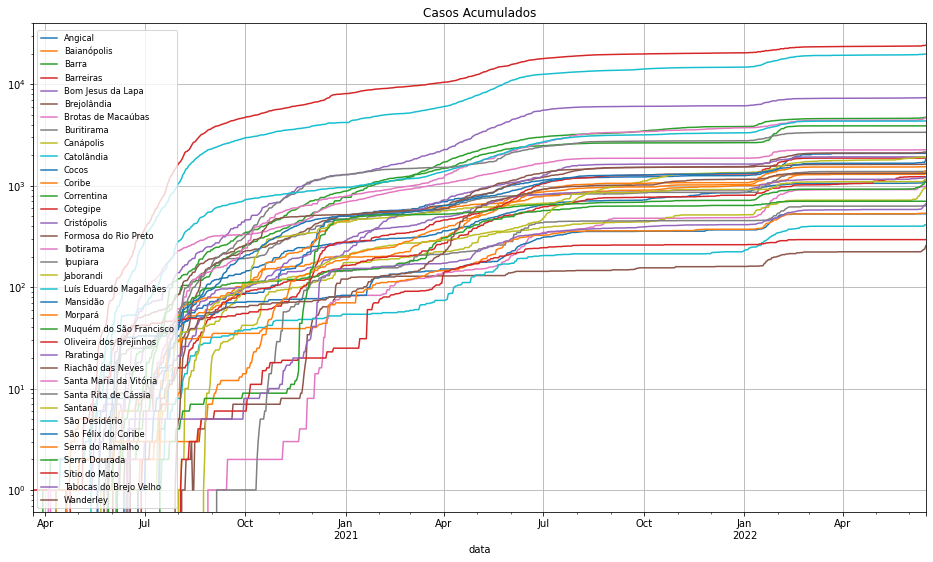

In [ ]:
casos_ac.set_index('data').plot(figsize=(16,9), logy=True, grid=True, title='Casos Acumulados').legend(loc='lower left', fontsize='small')

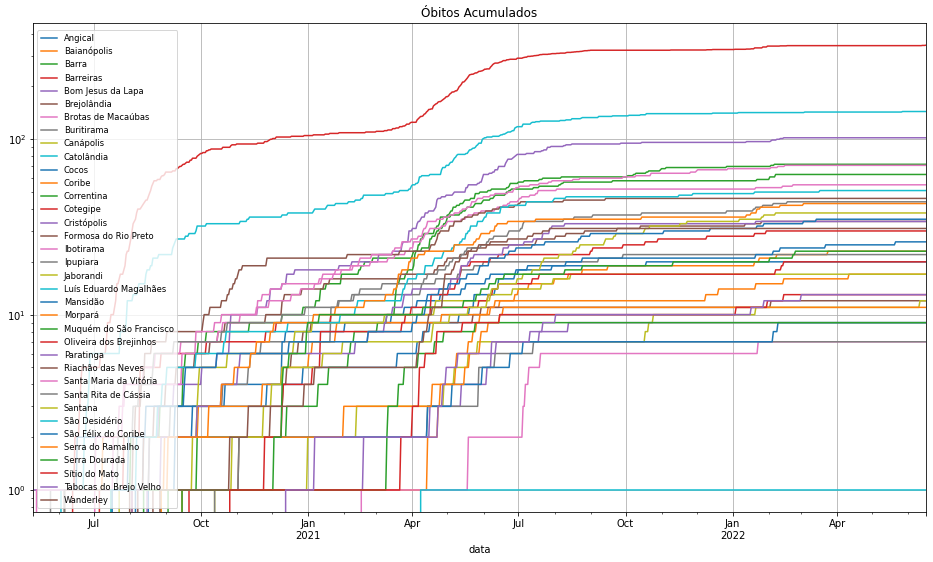

In [ ]:
obitos_ac.set_index('data').plot(figsize=(16,9), logy=True, grid=True, title='Óbitos Acumulados').legend(loc='lower left', fontsize='small')

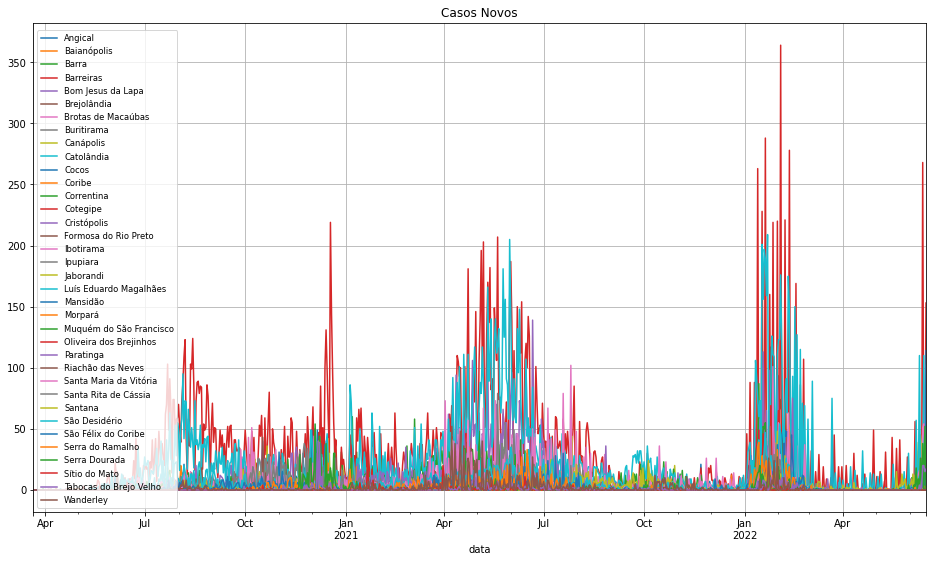

In [ ]:
casos_nv.set_index('data').plot(figsize=(16,9), grid=True, title='Casos Novos').legend(loc='lower left', fontsize='small')

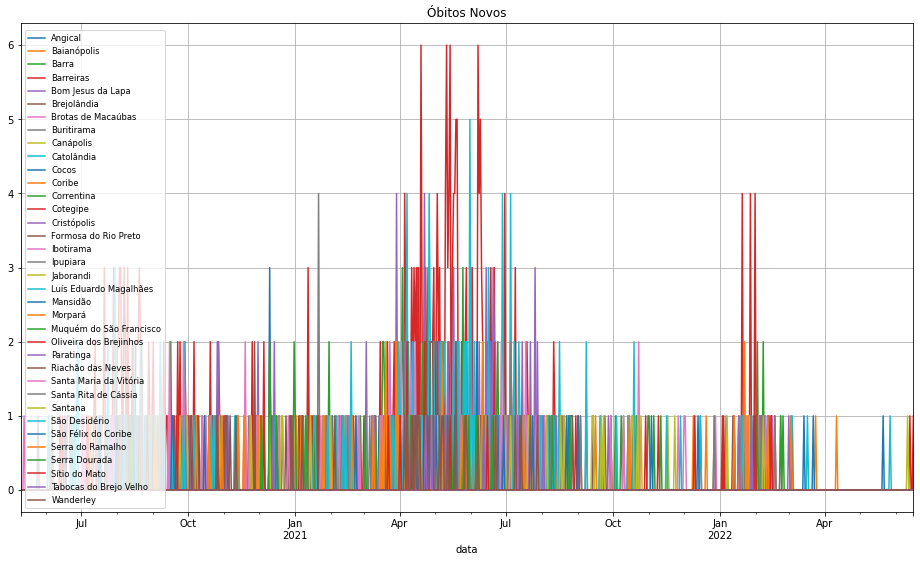

In [ ]:
obitos_nv.set_index('data').plot(figsize=(16,9), grid=True, title='Óbitos Novos').legend(loc='lower left', fontsize='small')

## Criação de dataframes para a incidência acumulada e de 14 dias de todas as cidades

### Atribuindo o quantitativo de população das cidades e organizando-as por microrregião

In [ ]:
# Cria uma lista com o quantitativo da população e outra com os nomes das respectivas cidades organizadas por microrregião
populacao = pd.Series([13977, 13877, 155439, 10557, 3577, 13782, 13910, 25591, 87519, 13643, 22339, 28338, 
                       33742, 12518, 12238, 69148, 9711, 18777, 14194, 32137, 8385, 39845, 26614, 15391, 18320, 
                       31472, 13012, 53578, 10231, 21174, 26927, 9865, 8519, 11348, 21825, 32000])
cidades_por_micro=['Angical', 'Baianópolis', 'Barreiras', 'Brejolândia', 'Catolândia',
                   'Cotegipe', 'Cristópolis', 'Formosa do Rio Preto',
                   'Luís Eduardo Magalhães', 'Mansidão', 'Riachão das Neves',
                   'Santa Rita de Cássia', 'São Desidério', 'Tabocas do Brejo Velho',
                   'Wanderley', 'Bom Jesus da Lapa', 'Canápolis', 'Cocos', 'Coribe',
                   'Correntina', 'Jaborandi', 'Santa Maria da Vitória', 'Santana',
                   'São Félix do Coribe', 'Serra Dourada', 'Serra do Ramalho',
                   'Sítio do Mato', 'Barra', 'Brotas de Macaúbas', 'Buritirama',
                   'Ibotirama', 'Ipupiara', 'Morpará', 'Muquém do São Francisco',
                   'Oliveira dos Brejinhos', 'Paratinga']

In [ ]:
# Cria dataframe com as cidades em uma coluna e as respetivas populações na segunda coluna
df_cid_pop = pd.DataFrame({'cidade':cidades_por_micro, 'populacao':populacao})
df_cid_pop

,cidade,populacao
0,Angical,13977
1,Baianópolis,13877
2,Barreiras,155439
3,Brejolândia,10557
4,Catolândia,3577
5,Cotegipe,13782
6,Cristópolis,13910
7,Formosa do Rio Preto,25591
8,Luís Eduardo Magalhães,87519
9,Mansidão,13643


### Cria dataframe com a incidência acumulada para todas as cidades da Macrorregião

In [ ]:
# Cria dataframe para incidência acumulada definida pela razão dos casos acumulados com a população
# multiplicada por 100k (padrão)
casos_ac_relativos = casos_ac.set_index('data')[cidades_por_micro].copy()
for i in range(len(cidades_por_micro)):
  casos_ac_relativos[cidades_por_micro[i]] = (casos_ac_relativos[cidades_por_micro[i]]/df_cid_pop.populacao[i])*100000

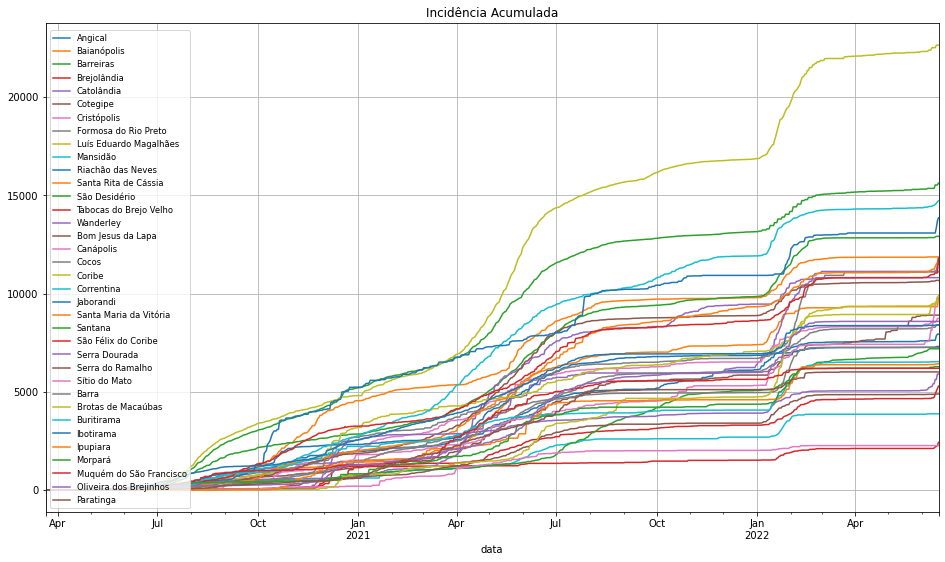

In [ ]:
casos_ac_relativos.plot(figsize=(16,9), grid=True, title='Incidência Acumulada').legend(loc='lower left', fontsize='small')

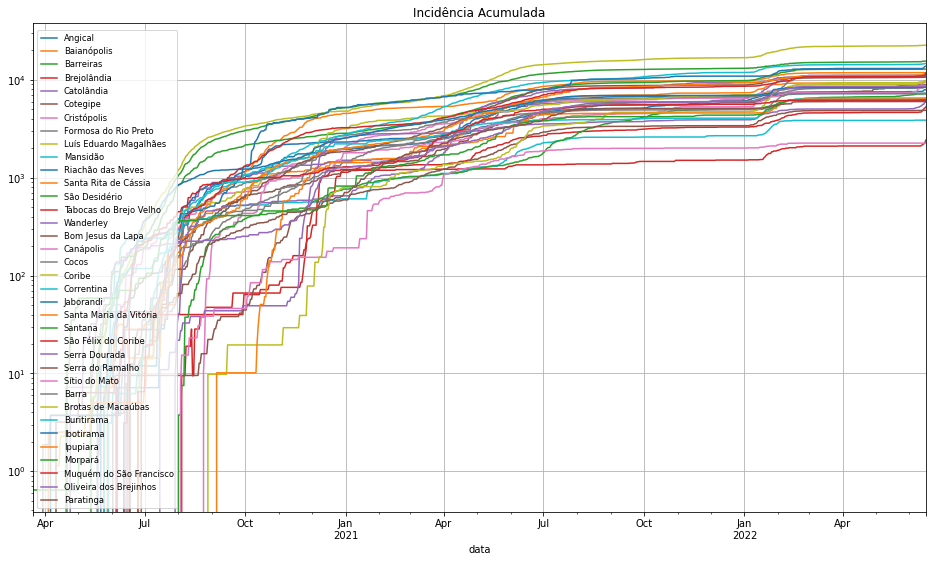

In [ ]:
casos_ac_relativos.plot(figsize=(16,9), grid=True, logy=True, title='Incidência Acumulada').legend(loc='lower left', fontsize='small')

### Cria dataframe com a incidência em 14 dias para todas as cidades da Macrorregião

In [ ]:
# Cria dataframe para casos novos semanais relativos onde divide-se o número de casos novos em 14 dias pela população 
# e multiplica por 100k (padrão)
casos_nv_sem_relativos = casos_nv_sem.set_index('data')[cidades_por_micro].copy()
for i in range(len(cidades_por_micro)):
  casos_nv_sem_relativos[cidades_por_micro[i]] = (casos_nv_sem_relativos[cidades_por_micro[i]]/df_cid_pop.populacao[i])*100000

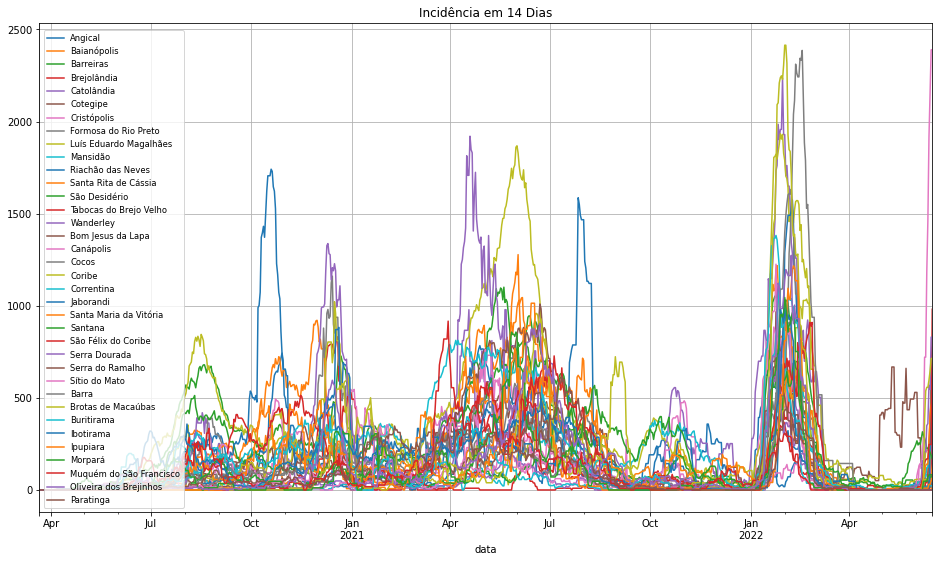

In [ ]:
casos_nv_sem_relativos.plot(figsize=(16,9), grid=True, title='Incidência em 14 Dias').legend(loc='lower left', fontsize='small')

## Criação de dataframes com os casos acumulados da macrorregião e da Bahia

### Download e tratamento do arquivo de dados da Secretaria Estadual de Saúde do Estado da Bahia

In [ ]:
# Download do arquivo de dados diretamente do site da Secretaria Estadual de Saúde do Estado da Bahia
url= 'https://ftp.sei.ba.gov.br/covid19/serie_casos_covid19_BA.csv'
df_bahia = pd.read_csv(url, sep=';')
df_bahia.head()

,date,casos,casos_novos
0,06/03/2020,1,1
1,07/03/2020,2,1
2,08/03/2020,2,0
3,09/03/2020,2,0
4,10/03/2020,2,0


In [ ]:
df_bahia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         843 non-null    object
 1   casos        843 non-null    int64 
 2   casos_novos  843 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 19.9+ KB


In [ ]:
# Backup do arquivo de dados do SEI
df_bahia.to_csv(r'/content/drive/MyDrive/Colab Notebooks/gt_dados/serie_casos_covid19_BA.csv')

In [ ]:
## Alternativa caso o site estiver down
#df_bahia = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gt_dados/serie_casos_covid19_BA.csv', sep=';')
##df_bahia = df_bahia.drop(columns='Unnamed: 0').copy() # remove coluna com indices
#df_bahia

In [ ]:
# Converte coluna de datas para o formato datetime
df_bahia.date = pd.to_datetime(df_bahia.date, format='%d/%m/%Y')
# Cria dataframe apenas com os casos acumulados da Bahia
casos_ac_bahia = df_bahia.drop(columns='casos_novos').copy() # remove coluna de casos novos
casos_ac_bahia = casos_ac_bahia.rename(columns={'date':'data', 'casos':'Bahia'}).copy() # renomeia colunas

In [ ]:
casos_ac_bahia.head()

,data,Bahia
0,2020-03-06,1
1,2020-03-07,2
2,2020-03-08,2
3,2020-03-09,2
4,2020-03-10,2


In [ ]:
datas_casos

DatetimeIndex(['2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
               '2020-03-29', '2020-03-30',
               ...
               '2022-06-07', '2022-06-08', '2022-06-09', '2022-06-10',
               '2022-06-11', '2022-06-12', '2022-06-13', '2022-06-14',
               '2022-06-15', '2022-06-16'],
              dtype='datetime64[ns]', length=818, freq='D')

In [ ]:
# Filtra o dataframe de casos acumulados da Bahia para ajustar ao período considerado na análise
temp_casos_ac_bahia = casos_ac_bahia[(casos_ac_bahia.data >= datas_casos.format()[0]) & 
                                     (casos_ac_bahia.data <= datas_casos.format()[-1])]
temp_casos_ac_bahia.set_index('data', inplace=True) # coloca a data como índice
temp_casos_ac_bahia

,Bahia
data,
2020-03-21,41
2020-03-22,55
2020-03-23,63
2020-03-24,79
2020-03-25,91
...,...
2022-06-12,1554649
2022-06-13,1554741
2022-06-14,1555693


### Criação de dataframe concatenando os casos acumulados do estado da Bahia com e da Macrorregião

In [ ]:
casos_ac_macro = pd.DataFrame({'casos': casos_ac.set_index('data').sum(axis=1)})
obitos_ac_macro = pd.DataFrame({'obitos': obitos_ac.set_index('data').sum(axis=1)})

In [ ]:
temp_casos_ac_macro = casos_ac_macro.rename(columns={'casos':'Macrorregião'}).copy()
temp_casos_ac_macro

,Macrorregião
data,
2020-03-21,1
2020-03-22,1
2020-03-23,1
2020-03-24,1
2020-03-25,1
...,...
2022-06-12,105306
2022-06-13,105787
2022-06-14,106168


Text(0.5, 1.0, 'Casos/Óbitos Acumulados na Macrorregião de Saúde Oeste da Bahia')

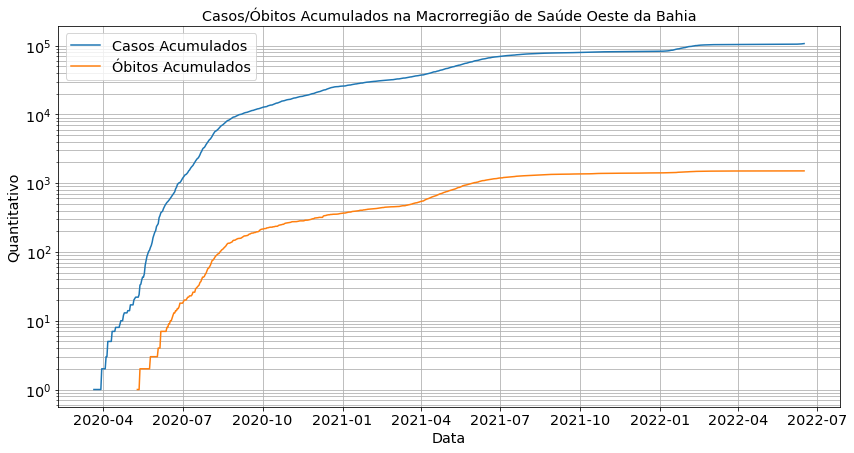

In [ ]:
# Figura mostrando casos e óbitos acumulados numa escala logarítmica
d1 = casos_ac_macro.reset_index().copy()
d2 = obitos_ac_macro.reset_index().copy()
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (14, 7),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.plot(d1.data, d1.casos)
plt.plot(d2.data, d2.obitos)
plt.yscale('log')
plt.xlabel('Data')
plt.ylabel('Quantitativo')
plt.grid(True, which='both')
plt.legend(['Casos Acumulados', 'Óbitos Acumulados'])
plt.title('Casos/Óbitos Acumulados na Macrorregião de Saúde Oeste da Bahia')
#plt.savefig("casos_obitos_ac_logscale.png")
#files.download("casos_obitos_ac_logscale.png")

In [ ]:
# Concatena os dataframes da Bahia e Macrorregião
casos_ac_bahia_macro = pd.concat([temp_casos_ac_bahia, temp_casos_ac_macro], axis=1)

In [ ]:
#pop_bahia_macro = pd.DataFrame({'bahia': [14021432], 'macrorregiao': [953520]}) # Censo IBGE 2010
#pop_bahia_macro = pd.DataFrame({'Bahia': [14930634], 'Macrorregião': [953520]}) # Censo IBGE 2020
pop_bahia_macro = pd.DataFrame({'Bahia': [14873064], 'Macrorregião': [953520]}) # Boletim Epidemiológico SESAB

In [ ]:
# Cria dataframes com o coeficiente de incidência da Bahia e Macrorregião
casos_ac_bahia_macro_relativos = casos_ac_bahia_macro.copy()
for col, pop in zip(casos_ac_bahia_macro.columns, pop_bahia_macro.columns):
  casos_ac_bahia_macro_relativos[col] = (casos_ac_bahia_macro[col]/pop_bahia_macro[pop][0])*100000

In [ ]:
casos_ac_bahia_macro_relativos

,Bahia,Macrorregião
data,,
2020-03-21,0.275666,0.104875
2020-03-22,0.369796,0.104875
2020-03-23,0.423585,0.104875
2020-03-24,0.531162,0.104875
2020-03-25,0.611844,0.104875
...,...,...
2022-06-12,10452.782292,11043.921470
2022-06-13,10453.400859,11094.366138
2022-06-14,10459.801693,11134.323349


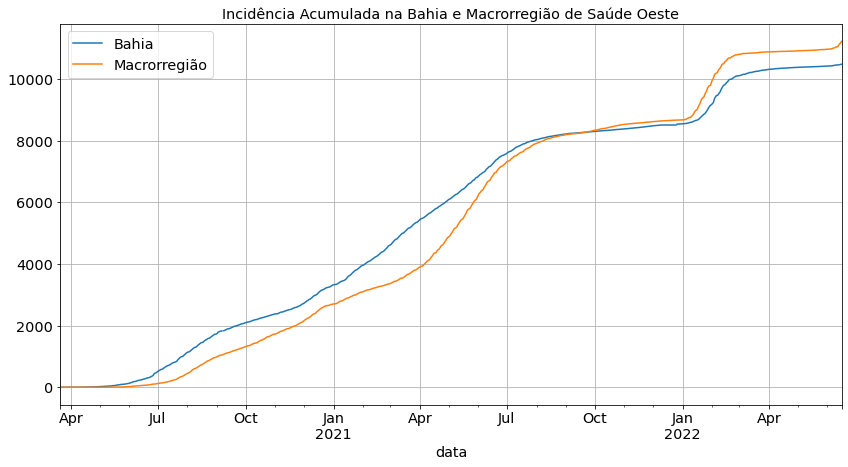

In [ ]:
casos_ac_bahia_macro_relativos.plot(figsize=(14,7), logy=False, grid=True, title='Incidência Acumulada na Bahia e Macrorregião de Saúde Oeste');

### Cria dataframe com casos novos semanais relativos da Bahia e Macrorregião

In [ ]:
periodo = 14 #casos novos em duas semanas
estado_macro =  ['Bahia', 'Macrorregião']
casos_nv_sem_bahia_macro = cria_dataframe_periodo(datas_casos, estado_macro, casos_ac_bahia_macro.reset_index(), periodo)

In [ ]:
# Cria dataframes com o coeficiente de incidência de 14 dias para Bahia e Macrorregião
casos_nv_sem_bahia_macro_relativos = casos_nv_sem_bahia_macro.copy()
for col, pop in zip(casos_ac_bahia_macro.columns, pop_bahia_macro.columns):
  casos_nv_sem_bahia_macro_relativos[col] = (casos_nv_sem_bahia_macro[col]/pop_bahia_macro[pop][0])*100000

### Cria dataframe ordenando as cidades com maiores coeficientes de incidência acumulados

In [ ]:
# Plotar apenas os gráficos dos cinco maiores coeficientes
casos_ac_relativos.iloc[-1:,:]

,Angical,Baianópolis,Barreiras,Brejolândia,Catolândia,Cotegipe,Cristópolis,Formosa do Rio Preto,Luís Eduardo Magalhães,Mansidão,...,Sítio do Mato,Barra,Brotas de Macaúbas,Buritirama,Ibotirama,Ipupiara,Morpará,Muquém do São Francisco,Oliveira dos Brejinhos,Paratinga
data,,,,,,,,,,,,,,,,,,,,,
2022-06-16,7934.463762,9735.533617,15625.422191,2424.931325,11490.075482,8902.916848,8727.534148,8385.760619,22644.225825,3877.446309,...,2259.452813,7258.576281,9647.150816,6536.318126,8404.203959,6426.761277,6280.079822,6194.924216,8581.901489,6009.375


In [ ]:
# Cria um dataframe ordenando as colunas das cidades do maior para o menor coeficiente de incidência na data final 
cid_maiores_coef_inc = casos_ac_relativos.sort_values(by=datas_casos[-1], axis=1, ascending=False).copy()

In [ ]:
cid_maiores_coef_inc.columns[0:5]

Index(['Luís Eduardo Magalhães', 'Barreiras', 'Correntina', 'Jaborandi',
       'São Desidério'],
      dtype='object')

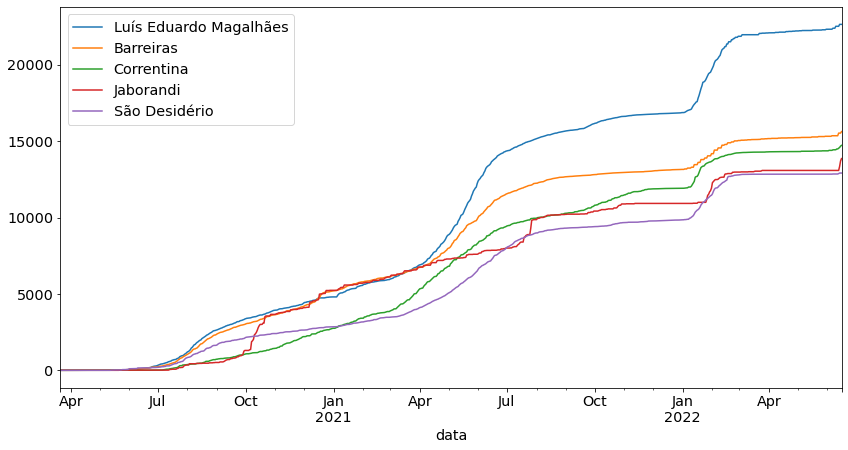

In [ ]:
cid_maiores_coef_inc.iloc[:,0:5].plot(figsize=(14,7), logy=False)

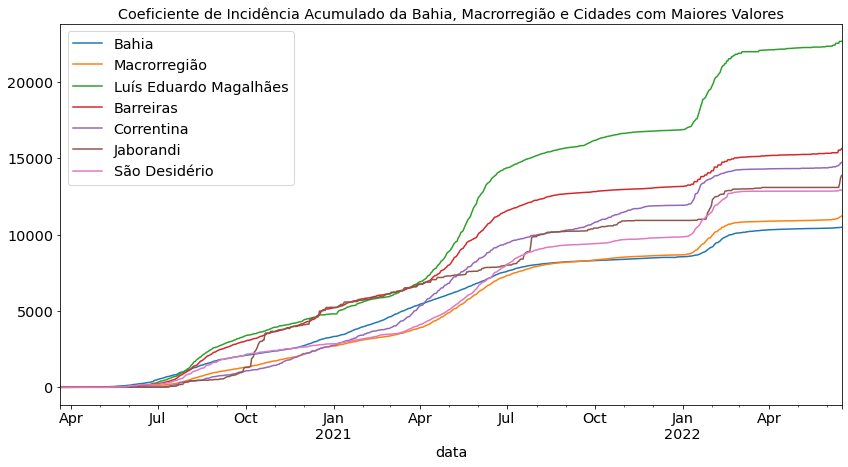

In [ ]:
ax = plt.gca()
casos_ac_bahia_macro_relativos.reset_index().plot(figsize=(14,7), x='data', ax=ax, logy=False)
cid_maiores_coef_inc.iloc[:,0:5].reset_index().plot(figsize=(14,7), x='data', ax=ax, logy=False)
plt.title('Coeficiente de Incidência Acumulado da Bahia, Macrorregião e Cidades com Maiores Valores');

### Cria dataframe ordenado com as cidades de maiores coeficientes de incidência de 14 dias

In [ ]:
# Mostrar os coeficientes de incidência de duas semanas do último dia
casos_nv_sem_relativos.iloc[-1:,:]

,Angical,Baianópolis,Barreiras,Brejolândia,Catolândia,Cotegipe,Cristópolis,Formosa do Rio Preto,Luís Eduardo Magalhães,Mansidão,...,Sítio do Mato,Barra,Brotas de Macaúbas,Buritirama,Ibotirama,Ipupiara,Morpará,Muquém do São Francisco,Oliveira dos Brejinhos,Paratinga
data,,,,,,,,,,,,,,,,,,,,,
2022-06-16,343.421335,403.545435,306.872793,312.588804,363.433044,21.767523,337.886413,179.750694,319.930529,21.989299,...,0.0,0.0,713.51774,23.613866,37.137446,50.684237,82.169269,0.0,0.0,0.0


In [ ]:
# Cria um dataframe ordenando as colunas das cidades do maior para o menor coeficiente de incidência de duas semanas na data final 
cid_maiores_coef_inc_sem = casos_nv_sem_relativos.sort_values(by=datas_casos[-1], axis=1, ascending=False).copy()

In [ ]:
cid_maiores_coef_inc_sem.columns[0:5]

Index(['Canápolis', 'São Félix do Coribe', 'Serra Dourada', 'Jaborandi',
       'Santa Maria da Vitória'],
      dtype='object')

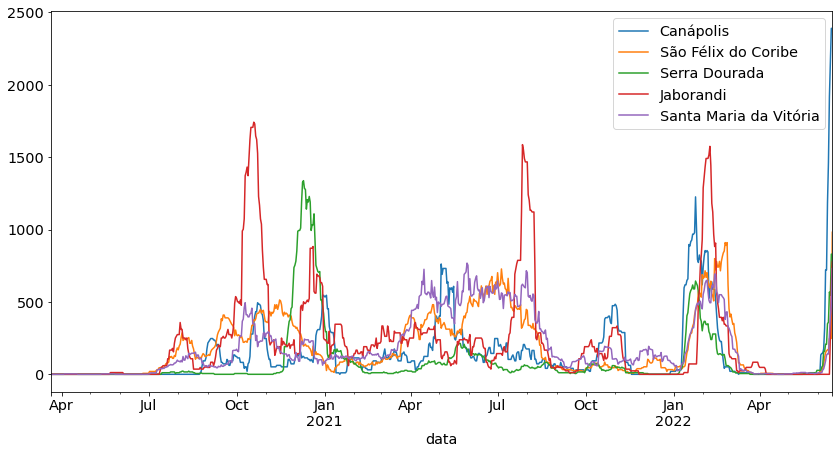

In [ ]:
cid_maiores_coef_inc_sem.iloc[:,0:5].plot(figsize=(14,7), logy=False)

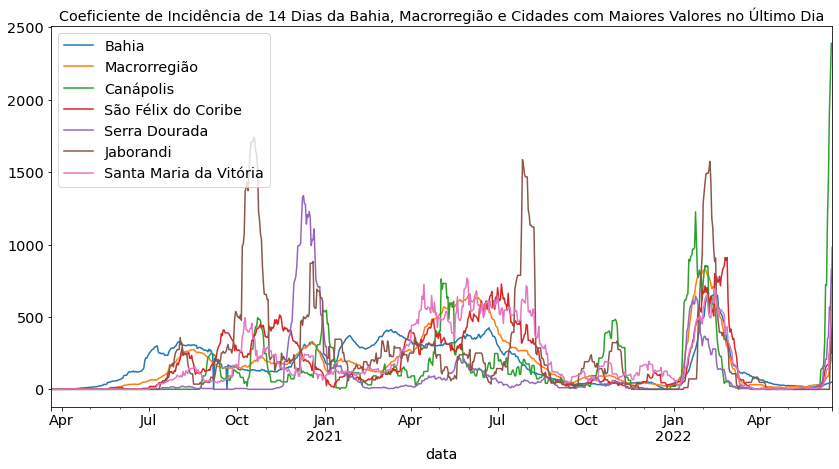

In [ ]:
ax = plt.gca()
casos_nv_sem_bahia_macro_relativos.plot(figsize=(14,7), x='data', ax=ax, logy=False)
cid_maiores_coef_inc_sem.iloc[:,0:5].reset_index().plot(figsize=(14,7), x='data', ax=ax, logy=False).legend(loc='upper left')
plt.title('Coeficiente de Incidência de 14 Dias da Bahia, Macrorregião e Cidades com Maiores Valores no Último Dia');

## Modelo relacional dos dados

In [ ]:
def cria_dataframe_relacional(data, cidade, df_serie, nome):
  df_temp = df_serie.copy()
  df_temp.drop('data', inplace=True, axis=1) # remove a coluna datas
  df_temp = df_temp.T.reset_index(drop=True).copy() #transpõe o dataframe e reseta o índice cidades
  df_rel = df_temp.copy()

  for i in range(len(data)):
    df_rel.rename(columns={df_rel.columns[i]:data[i]}, inplace=True) # renomeia as colunas com as datas

  df_rel.insert(0, 'cidade', cidade) # insere coluna com as cidades
  df_rel = df_rel.set_index(['cidade']).T.copy()
  df_rel = df_rel.stack(level=0).reset_index().rename(columns={'level_0':'data',0:nome}).copy()

  return df_rel

In [ ]:
df_rel_ac = cria_dataframe_relacional(datas_casos, cidades, casos_ac, 'casos')
df_rel_nv = cria_dataframe_relacional(datas_casos, cidades, casos_nv, 'casos_novos')
df_rel_ob_ac = cria_dataframe_relacional(datas_obitos, cidades, obitos_ac, 'obitos')
df_rel_ob_nv = cria_dataframe_relacional(datas_obitos, cidades, obitos_nv, 'obitos_novos')
df_rel_nv_sem = cria_dataframe_relacional(datas_casos, cidades, casos_nv_sem, 'casos_novos_2sem')
df_rel_ob_nv_sem = cria_dataframe_relacional(datas_obitos, cidades, obitos_nv_sem, 'obitos_novos_2sem')
df_rel_nv_med_movel = cria_dataframe_relacional(datas_casos, cidades, casos_med_movel, 'media_movel_casos')
df_rel_var_perc_14dias_nv = cria_dataframe_relacional(datas_casos, cidades, casos_var_per_14dias, 'var_%_14dias_casos')
df_rel_ob_nv_med_movel = cria_dataframe_relacional(datas_obitos, cidades, obitos_med_movel, 'media_movel_obitos')
df_rel_var_perc_14dias_ob_nv = cria_dataframe_relacional(datas_obitos, cidades, obitos_var_per_14dias, 'var_%_14dias_obitos')

In [ ]:
df_rel_ac

,data,cidade,casos
0,2020-03-21,Angical,0
1,2020-03-21,Baianópolis,0
2,2020-03-21,Barra,0
3,2020-03-21,Barreiras,1
4,2020-03-21,Bom Jesus da Lapa,0
...,...,...,...
29443,2022-06-16,Serra do Ramalho,1539
29444,2022-06-16,Serra Dourada,1082
29445,2022-06-16,Sítio do Mato,294
29446,2022-06-16,Tabocas do Brejo Velho,662


In [ ]:
df_rel_casos = pd.concat([df_rel_ac.set_index('data'),
                          df_rel_nv.set_index('data')[['casos_novos']],
                          df_rel_nv_med_movel.set_index('data')[['media_movel_casos']],
                          df_rel_var_perc_14dias_nv.set_index('data')[['var_%_14dias_casos']]], axis=1)

df_rel_obitos = pd.concat([df_rel_ob_ac.set_index('data'),
                           df_rel_ob_nv.set_index('data')[['obitos_novos']],
                           df_rel_ob_nv_med_movel.set_index('data')[['media_movel_obitos']],
                           df_rel_var_perc_14dias_ob_nv.set_index('data')[['var_%_14dias_obitos']]], axis=1)

In [ ]:
# Dataframe concatenando a incidência de casos novos semanais e acumulados da macrorregião
df_macro_incid_novos_sem = casos_nv_sem_bahia_macro_relativos[['data', 'Macrorregião']].rename(columns={'Macrorregião':'incid_novos_2sem'}).set_index('data')
df_macro_incid_acumulados = casos_ac_bahia_macro_relativos[['Macrorregião']].rename(columns={'Macrorregião':'incid_acumulados'})
df_incid_macro = pd.concat([np.round(df_macro_incid_novos_sem, 2), np.round(df_macro_incid_acumulados, 2)], axis=1)

In [ ]:
# Dataframe concatemando a incidência de casos novos semanais e acumulados das 36 cidades da macrorregião
df_incid_novos_sem = cria_dataframe_relacional(datas_casos, cidades, casos_nv_sem_relativos[cidades]
                                               .reset_index(), 'incid_novos_2sem' )
df_incid_acumulados = cria_dataframe_relacional(datas_casos, cidades, casos_ac_relativos[cidades]
                                                .reset_index(), 'incid_acumulados')
df_incid_municipios = pd.concat([np.round(df_incid_novos_sem.set_index('data'), 2),
                                 np.round(df_incid_acumulados.set_index('data').drop(columns=['cidade']), 2)], axis=1)

# Grava dados de casos e óbitos da macrorregião e municípios na planilha

In [ ]:
# Arquivo que será utilizado no metamodelo de regressão
casos_ac.to_csv('/content/drive/MyDrive/Colab Notebooks/TCC Ciência de Dados PUC - MG/casos_acumulados_covid19_oeste_ba.csv', index=False)

In [ ]:
def cria_dataframes_media_movel_variac_percent_macrorreg_cidades(df_rel_ac, df_rel_nv, df_rel_ob_ac, df_rel_ob_nv, df_rel_nv_sem, df_rel_ob_nv_sem, df_rel_casos, df_rel_obitos):

  casos = df_rel_ac.groupby('data').agg({'casos': 'sum'}).reset_index().copy()
  casos['casos_novos'] = df_rel_nv.groupby('data').agg({'casos_novos': 'sum'}).reset_index()['casos_novos']
  casos['media_movel_casos'] = casos['casos_novos'].rolling(7).mean() # acrescenta coluna ao dataframe com média móvel
  casos = casos.round({'media_movel_casos': 0}).fillna(0).copy()
  casos['media_movel_casos'] = casos['media_movel_casos'].astype(int)
  casos['var_%_14dias_casos'] = round( (casos.media_movel_casos - casos.media_movel_casos.shift(13)) / casos.media_movel_casos.shift(13) * 100, 1)
  casos['casos_novos_2sem'] = df_rel_nv_sem.groupby('data').agg({'casos_novos_2sem': 'sum'}).reset_index()['casos_novos_2sem']
  casos['casos_novos_2sem'] = casos['casos_novos_2sem'].fillna(0).astype(int)
  obitos = df_rel_ob_ac.groupby('data').agg({'obitos': 'sum'}).reset_index().copy()
  obitos['obitos_novos'] = df_rel_ob_nv.groupby('data').agg({'obitos_novos': 'sum'}).reset_index()['obitos_novos']
  obitos['media_movel_obitos'] = obitos['obitos_novos'].rolling(7).mean()
  obitos = obitos.round({'media_movel_obitos': 0}).fillna(0).copy()
  obitos['media_movel_obitos'] = obitos['media_movel_obitos'].astype(int)
  obitos['var_%_14dias_obitos'] = round( (obitos.media_movel_obitos - obitos.media_movel_obitos.shift(13)) / obitos.media_movel_obitos.shift(13) * 100, 1)
  obitos['obitos_novos_2sem'] = df_rel_ob_nv_sem.groupby('data').agg({'obitos_novos_2sem': 'sum'}).reset_index()['obitos_novos_2sem']
  obitos['obitos_novos_2sem'] = obitos['obitos_novos_2sem'].fillna(0).astype(int)

  df_macro = pd.concat([casos.set_index('data'),
                        df_incid_macro,
                        obitos.set_index('data')
                        ], axis=1)
  df_macro.index = df_macro.index.strftime("%Y-%m-%d")
  df_macro['obitos_novos'] = df_macro['obitos_novos'].fillna(0).astype(int)
  df_macro['media_movel_obitos'] = df_macro['media_movel_obitos'].fillna(0).astype(int)
  df_macro['obitos_novos_2sem'] = df_macro['obitos_novos_2sem'].fillna(0).astype(int)


  casos = df_rel_casos.copy()
  df_rel_temp_casos = df_rel_nv_sem.copy()
  df_rel_temp_casos.set_index('data', inplace=True)
  df_rel_temp_casos['%2sem_da_macro'] = round( df_rel_nv_sem.set_index('data')[['casos_novos_2sem']]/df_rel_nv_sem.groupby(['data']).sum()*100, 2)
  casos = pd.concat([casos,
                     df_rel_temp_casos[['casos_novos_2sem', '%2sem_da_macro']],
                     df_incid_municipios[['incid_novos_2sem', 'incid_acumulados']]
                     ], axis=1)

  casos.index = casos.index.strftime("%Y-%m-%d")
  
  obitos = df_rel_obitos.copy()
  df_rel_temp_obitos = df_rel_ob_nv_sem.copy()
  df_rel_temp_obitos.set_index('data', inplace=True)
  df_rel_temp_obitos['%2sem_da_macro'] = round( df_rel_ob_nv_sem.set_index('data')[['obitos_novos_2sem']]/df_rel_ob_nv_sem.groupby(['data']).sum()*100, 2)
  obitos = pd.concat([obitos, df_rel_temp_obitos[['obitos_novos_2sem', '%2sem_da_macro']]], axis=1)

  obitos.index = obitos.index.strftime("%Y-%m-%d")

  return df_macro, casos, obitos


In [ ]:
exibe_arq = cria_dataframes_media_movel_variac_percent_macrorreg_cidades(df_rel_ac,
                                                                         df_rel_nv,
                                                                         df_rel_ob_ac,
                                                                         df_rel_ob_nv,
                                                                         df_rel_nv_sem,
                                                                         df_rel_ob_nv_sem,
                                                                         df_rel_casos,
                                                                         df_rel_obitos)

In [ ]:
exibe_arq[0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 818 entries, 2020-03-21 to 2022-06-16
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   casos                818 non-null    int64  
 1   casos_novos          818 non-null    int64  
 2   media_movel_casos    818 non-null    int64  
 3   var_%_14dias_casos   784 non-null    float64
 4   casos_novos_2sem     818 non-null    int64  
 5   incid_novos_2sem     818 non-null    float64
 6   incid_acumulados     818 non-null    float64
 7   obitos               768 non-null    float64
 8   obitos_novos         818 non-null    int64  
 9   media_movel_obitos   818 non-null    int64  
 10  var_%_14dias_obitos  588 non-null    float64
 11  obitos_novos_2sem    818 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 83.1+ KB


In [ ]:
exibe_arq[1].info()

<class 'pandas.core.frame.DataFrame'>
Index: 29448 entries, 2020-03-21 to 2022-06-16
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cidade              29448 non-null  object 
 1   casos               29448 non-null  int64  
 2   casos_novos         29448 non-null  int64  
 3   media_movel_casos   29448 non-null  int64  
 4   var_%_14dias_casos  29448 non-null  float64
 5   casos_novos_2sem    29448 non-null  int64  
 6   %2sem_da_macro      28944 non-null  float64
 7   incid_novos_2sem    29448 non-null  float64
 8   incid_acumulados    29448 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 2.2+ MB


In [ ]:
exibe_arq[2].info()

<class 'pandas.core.frame.DataFrame'>
Index: 27648 entries, 2020-05-10 to 2022-06-16
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cidade               27648 non-null  object 
 1   obitos               27648 non-null  int64  
 2   obitos_novos         27648 non-null  int64  
 3   media_movel_obitos   27648 non-null  int64  
 4   var_%_14dias_obitos  27648 non-null  float64
 5   obitos_novos_2sem    27648 non-null  int64  
 6   %2sem_da_macro       26028 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 1.7+ MB


In [ ]:
import google.auth
from google.colab import auth
from gspread_pandas import Spread

auth.authenticate_user()
credentials, project_id = google.auth.default()
nome_planilha = 'dados_dashboard_covid19'
spread = Spread(nome_planilha, creds=credentials)

In [ ]:
spread.df_to_sheet(exibe_arq[0], index=True, sheet='macrorregião', replace=True)
spread.df_to_sheet(exibe_arq[1], index=True, sheet='municípios casos', replace=True)
spread.df_to_sheet(exibe_arq[2], index=True, sheet='municípios óbitos', replace=True)
print(spread)

# Ocupação média semanal de leitos

##Processamento dos dados

#### Visualização inicial

In [ ]:
df_leitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Columns: 200 entries, 0 to 199
dtypes: object(200)
memory usage: 26.7+ KB


In [ ]:
df_leitos.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,Unidade Hospitalar,2021-12-07,2021-12-08,2021-12-09,2021-12-10,2021-12-11,2021-12-12,2021-12-13,2021-12-14,2021-12-15,...,2022-06-14,2022-06-15,2022-06-16,2022-06-17,2022-06-18,2022-06-19,2022-06-20,2022-06-21,2022-06-22,2022-06-23
1,HO (Clínicos Total),5,5,5,5,5,5,5,5,5,...,2,2,2,2,2,2,2,2,2,2
2,HO (Clínicos Ocupados),1,1,2,2,2,2,0,1,1,...,1,2,2,2,2,2,2,2,2,2
3,HO (UTI Total),15,15,15,15,15,15,15,15,15,...,10,10,10,10,10,10,10,10,10,10
4,HO (UTI Ocupados),3,3,5,3,3,3,3,2,2,...,3,5,5,5,7,7,5,7,6,6


### Seleção e organização dos dados a partir da planilha

In [ ]:
data_final = casos_ac.data.iloc[-1].strftime("%Y-%m-%d")
data_final

'2022-06-16'

In [ ]:
# Data em que o GTG-COVID/UFOB começou a lançar a série temporal de dados de ocupação de leitos
data_inicial = '2021-12-07'

In [ ]:
# Mapeamento dos dados da planilha
leitos_temp = df_leitos.iloc[1:17,:].copy()
leitos_temp.columns = df_leitos.iloc[0]
leitos_temp.reset_index().loc[:,data_inicial: data_final]

,2021-12-07,2021-12-08,2021-12-09,2021-12-10,2021-12-11,2021-12-12,2021-12-13,2021-12-14,2021-12-15,2021-12-16,...,2022-06-07,2022-06-08,2022-06-09,2022-06-10,2022-06-11,2022-06-12,2022-06-13,2022-06-14,2022-06-15,2022-06-16
0,5,5,5,5,5,5,5,5,5,5,...,2,2,2,2,2,2,2,2,2,2
1,1,1,2,2,2,2,0,1,1,1,...,0,0,1,0,0,0,0,1,2,2
2,15,15,15,15,15,15,15,15,15,15,...,10,10,10,10,10,10,10,10,10,10
3,3,3,5,3,3,3,3,2,2,2,...,1,1,1,2,2,2,3,3,5,5
4,10,10,10,10,10,10,10,10,10,10,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,43,43,43,43,43,43,43,43,43,43,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,10,10,10,10,10,10,10,10,10,10,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Remoção de possíveis pontos ou virgulas dos valores
df_temp_leitos = leitos_temp.reset_index().loc[:, data_inicial : data_final]
for col in df_temp_leitos.columns:
  df_temp_leitos[col] = df_temp_leitos[col].str.replace('\.','').astype(int)

In [ ]:
# Cálculo dos leitos totais (UTI+Clínicos) e ocupados para cada uma das unidades de saúde
HO_tot = (df_temp_leitos.iloc[0]+df_temp_leitos.iloc[2]).to_numpy()
HO_ocup = (df_temp_leitos.iloc[1] + df_temp_leitos.iloc[3]).to_numpy()
ITIBA_tot = (df_temp_leitos.iloc[4]).to_numpy()
ITIBA_ocup = (df_temp_leitos.iloc[5]).to_numpy()
HMED_tot = (df_temp_leitos.iloc[6]).to_numpy()
HMED_ocup = (df_temp_leitos.iloc[7]).to_numpy()
HSR_tot = (df_temp_leitos.iloc[8]+df_temp_leitos.iloc[10]).to_numpy()
HSR_ocup = (df_temp_leitos.iloc[9]+df_temp_leitos.iloc[11]).to_numpy()
HCD_tot = (df_temp_leitos.iloc[12]+df_temp_leitos.iloc[14]).to_numpy()
HCD_ocup = (df_temp_leitos.iloc[13]+df_temp_leitos.iloc[15]).to_numpy()

## Criação de dataframes

### Dataframe com cidades e regiões de saúde

In [ ]:
data = [
        ['Angical', 'Barreiras'],
        ['Baianópolis', 'Barreiras'],
        ['Barra', 'Ibotirama'],
        ['Barreiras', 'Barreiras'],
        ['Bom Jesus da Lapa', 'SaMaVi'],
        ['Brejolândia', 'Barreiras'],
        ['Brotas de Macaúbas', 'Ibotirama'],
        ['Buritirama', 'Ibotirama'],
        ['Canápolis', 'SaMaVi'],
        ['Catolândia', 'Barreiras'],
        ['Cocos', 'SaMaVi'],
        ['Coribe', 'SaMaVi'],
        ['Correntina', 'SaMaVi'],
        ['Cotegipe', 'Barreiras'],
        ['Cristópolis', 'Barreiras'],
        ['Formosa do Rio Preto', 'Barreiras'],
        ['Ibotirama', 'Ibotirama'],
        ['Ipupiara', 'Ibotirama'],
        ['Jaborandi', 'SaMaVi'],
        ['Luís Eduardo Magalhães', 'Barreiras'],
        ['Mansidão', 'Barreiras'],
        ['Morpará', 'Ibotirama'],
        ['Muquém do São Francisco', 'Ibotirama'],
        ['Oliveira dos Brejinhos', 'Ibotirama'],
        ['Paratinga', 'Ibotirama'],
        ['Riachão das Neves', 'Barreiras'],
        ['Santa Maria da Vitória', 'SaMaVi'],
        ['Santa Rita de Cássia', 'Barreiras'],
        ['Santana', 'SaMaVi'],
        ['São Desidério', 'Barreiras'],
        ['São Félix do Coribe', 'SaMaVi'],
        ['Serra do Ramalho', 'SaMaVi'],
        ['Serra Dourada', 'SaMaVi'],
        ['Sítio do Mato', 'SaMaVi'],
        ['Tabocas do Brejo Velho', 'Barreiras'],
        ['Wanderley', 'Barreiras']
        ]

df_cid_reg_saude =  pd.DataFrame(data, columns=['cidade', 'reg_saude'])
df_cid_reg_saude

,cidade,reg_saude
0,Angical,Barreiras
1,Baianópolis,Barreiras
2,Barra,Ibotirama
3,Barreiras,Barreiras
4,Bom Jesus da Lapa,SaMaVi
5,Brejolândia,Barreiras
6,Brotas de Macaúbas,Ibotirama
7,Buritirama,Ibotirama
8,Canápolis,SaMaVi
9,Catolândia,Barreiras


### Dataframe com os dias desde que a ocupação de leitos foi contabilizada (2021-12-07)

In [ ]:
df_dias_ocup_leitos = pd.DataFrame({'data': pd.date_range(start=data_inicial, end=data_final, freq='D').strftime("%Y-%m-%d")})
df_dias_ocup_leitos

,data
0,2021-12-07
1,2021-12-08
2,2021-12-09
3,2021-12-10
4,2021-12-11
...,...
187,2022-06-12
188,2022-06-13
189,2022-06-14
190,2022-06-15


### Dataframe com a taxa de ocupação diária

In [ ]:
data = [
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HSR_ocup)/(HO_tot+HSR_tot),
        (HO_ocup+ITIBA_ocup+HMED_ocup)/(HO_tot+ITIBA_tot+HMED_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HSR_ocup)/(HO_tot+HSR_tot),
        (HO_ocup+HSR_ocup)/(HO_tot+HSR_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HSR_ocup)/(HO_tot+HSR_tot),
        (HO_ocup+HSR_ocup)/(HO_tot+HSR_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HSR_ocup)/(HO_tot+HSR_tot),
        (HO_ocup+HSR_ocup)/(HO_tot+HSR_tot),
        (HO_ocup+HSR_ocup)/(HO_tot+HSR_tot),
        (HO_ocup+HSR_ocup)/(HO_tot+HSR_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot)
        ]

df_temp = pd.DataFrame(data).T
for i in range(len(df_temp.columns)):
  df_temp.rename(columns={df_temp.columns[i]:df_cid_reg_saude.cidade[i]}, inplace=True)

df_taxa_ocup_dia = pd.concat([df_dias_ocup_leitos, df_temp], axis=1)
df_taxa_ocup_dia

,data,Angical,Baianópolis,Barra,Barreiras,Bom Jesus da Lapa,Brejolândia,Brotas de Macaúbas,Buritirama,Canápolis,...,Santa Maria da Vitória,Santa Rita de Cássia,Santana,São Desidério,São Félix do Coribe,Serra do Ramalho,Serra Dourada,Sítio do Mato,Tabocas do Brejo Velho,Wanderley
0,2021-12-07,0.063492,0.063492,0.125000,0.054795,0.102041,0.063492,0.125000,0.125000,0.102041,...,0.102041,0.063492,0.102041,0.063492,0.102041,0.102041,0.102041,0.102041,0.063492,0.063492
1,2021-12-08,0.079365,0.079365,0.125000,0.068493,0.102041,0.079365,0.125000,0.125000,0.102041,...,0.102041,0.079365,0.102041,0.079365,0.102041,0.102041,0.102041,0.102041,0.079365,0.079365
2,2021-12-09,0.111111,0.111111,0.200000,0.095890,0.183673,0.111111,0.200000,0.200000,0.183673,...,0.183673,0.111111,0.183673,0.111111,0.183673,0.183673,0.183673,0.183673,0.111111,0.111111
3,2021-12-10,0.079365,0.079365,0.150000,0.068493,0.142857,0.079365,0.150000,0.150000,0.142857,...,0.142857,0.079365,0.142857,0.079365,0.142857,0.142857,0.142857,0.142857,0.079365,0.079365
4,2021-12-11,0.079365,0.079365,0.150000,0.068493,0.142857,0.079365,0.150000,0.150000,0.142857,...,0.142857,0.079365,0.142857,0.079365,0.142857,0.142857,0.142857,0.142857,0.079365,0.079365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2022-06-12,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,...,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
188,2022-06-13,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,...,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000
189,2022-06-14,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
190,2022-06-15,0.583333,0.583333,0.583333,0.583333,0.583333,0.583333,0.583333,0.583333,0.583333,...,0.583333,0.583333,0.583333,0.583333,0.583333,0.583333,0.583333,0.583333,0.583333,0.583333


### Dataframes com os leitos ocupados por dia e a média da ocupação em 14 dias

In [ ]:
data = [
        (HO_ocup+HMED_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HSR_ocup),
        (HO_ocup+ITIBA_ocup+HMED_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HSR_ocup),
        (HO_ocup+HSR_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HSR_ocup),
        (HO_ocup+HSR_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HSR_ocup),
        (HO_ocup+HSR_ocup),
        (HO_ocup+HSR_ocup),
        (HO_ocup+HSR_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HMED_ocup)
        ]

df_temp = pd.DataFrame(data).T
for i in range(len(df_temp.columns)):
  df_temp.rename(columns={df_temp.columns[i]:df_cid_reg_saude.cidade[i]}, inplace=True)

df_leitos_ocup_dia = pd.concat([df_dias_ocup_leitos, df_temp], axis=1)
df_leitos_ocup_dia

,data,Angical,Baianópolis,Barra,Barreiras,Bom Jesus da Lapa,Brejolândia,Brotas de Macaúbas,Buritirama,Canápolis,...,Santa Maria da Vitória,Santa Rita de Cássia,Santana,São Desidério,São Félix do Coribe,Serra do Ramalho,Serra Dourada,Sítio do Mato,Tabocas do Brejo Velho,Wanderley
0,2021-12-07,4,4,5,4,5,4,5,5,5,...,5,4,5,4,5,5,5,5,4,4
1,2021-12-08,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2,2021-12-09,7,7,8,7,9,7,8,8,9,...,9,7,9,7,9,9,9,9,7,7
3,2021-12-10,5,5,6,5,7,5,6,6,7,...,7,5,7,5,7,7,7,7,5,5
4,2021-12-11,5,5,6,5,7,5,6,6,7,...,7,5,7,5,7,7,7,7,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2022-06-12,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
188,2022-06-13,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
189,2022-06-14,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
190,2022-06-15,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


In [ ]:
df_leitos_ocup_med = df_dias_ocup_leitos.copy()
for i in range(len(cidades)):
  df_leitos_ocup_med[cidades[i]] = df_leitos_ocup_dia[cidades[i]].rolling(14).mean() # acrescenta coluna ao dataframe com média móvel
  df_leitos_ocup_med = df_leitos_ocup_med.round({cidades[i]: 0}).fillna(0).copy()
  df_leitos_ocup_med[cidades[i]] = df_leitos_ocup_med[cidades[i]].astype(int)
df_leitos_ocup_med

,data,Angical,Baianópolis,Barra,Barreiras,Bom Jesus da Lapa,Brejolândia,Brotas de Macaúbas,Buritirama,Canápolis,...,Santa Maria da Vitória,Santa Rita de Cássia,Santana,São Desidério,São Félix do Coribe,Serra do Ramalho,Serra Dourada,Sítio do Mato,Tabocas do Brejo Velho,Wanderley
0,2021-12-07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-12-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-12-09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-12-10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-12-11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2022-06-12,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
188,2022-06-13,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
189,2022-06-14,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
190,2022-06-15,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


### Dataframes com o total de leitos por dia e média do total em 14 dias

In [ ]:
data = [
        (HO_tot+HMED_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HSR_tot),
        (HO_tot+ITIBA_tot+HMED_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HSR_tot),
        (HO_tot+HSR_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HSR_tot),
        (HO_tot+HSR_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HSR_tot),
        (HO_tot+HSR_tot),
        (HO_tot+HSR_tot),
        (HO_tot+HSR_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HMED_tot)
        ]

df_temp = pd.DataFrame(data).T
for i in range(len(df_temp.columns)):
  df_temp.rename(columns={df_temp.columns[i]:df_cid_reg_saude.cidade[i]}, inplace=True)

df_leitos_tot_dia = pd.concat([df_dias_ocup_leitos, df_temp], axis=1)
df_leitos_tot_dia


,data,Angical,Baianópolis,Barra,Barreiras,Bom Jesus da Lapa,Brejolândia,Brotas de Macaúbas,Buritirama,Canápolis,...,Santa Maria da Vitória,Santa Rita de Cássia,Santana,São Desidério,São Félix do Coribe,Serra do Ramalho,Serra Dourada,Sítio do Mato,Tabocas do Brejo Velho,Wanderley
0,2021-12-07,63,63,40,73,49,63,40,40,49,...,49,63,49,63,49,49,49,49,63,63
1,2021-12-08,63,63,40,73,49,63,40,40,49,...,49,63,49,63,49,49,49,49,63,63
2,2021-12-09,63,63,40,73,49,63,40,40,49,...,49,63,49,63,49,49,49,49,63,63
3,2021-12-10,63,63,40,73,49,63,40,40,49,...,49,63,49,63,49,49,49,49,63,63
4,2021-12-11,63,63,40,73,49,63,40,40,49,...,49,63,49,63,49,49,49,49,63,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2022-06-12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
188,2022-06-13,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
189,2022-06-14,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
190,2022-06-15,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12


In [ ]:
df_leitos_tot_med = df_dias_ocup_leitos.copy()
for i in range(len(cidades)):
  df_leitos_tot_med[cidades[i]] = df_leitos_tot_dia[cidades[i]].rolling(14).mean() # acrescenta coluna ao dataframe com média móvel
  df_leitos_tot_med = df_leitos_tot_med.round({cidades[i]: 0}).fillna(0).copy()
  df_leitos_tot_med[cidades[i]] = df_leitos_tot_med[cidades[i]].astype(int)
df_leitos_tot_med

,data,Angical,Baianópolis,Barra,Barreiras,Bom Jesus da Lapa,Brejolândia,Brotas de Macaúbas,Buritirama,Canápolis,...,Santa Maria da Vitória,Santa Rita de Cássia,Santana,São Desidério,São Félix do Coribe,Serra do Ramalho,Serra Dourada,Sítio do Mato,Tabocas do Brejo Velho,Wanderley
0,2021-12-07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-12-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-12-09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-12-10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-12-11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2022-06-12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
188,2022-06-13,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
189,2022-06-14,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
190,2022-06-15,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12


### Dataframe com taxa média de ocupação em 14 dias

In [ ]:
df_taxa_med_ocup14d = (df_leitos_ocup_med.set_index('data')/df_leitos_tot_med.set_index('data')).round(3)
df_taxa_med_ocup14d = df_taxa_med_ocup14d.fillna(0).reset_index()
df_taxa_med_ocup14d.tail()

,data,Angical,Baianópolis,Barra,Barreiras,Bom Jesus da Lapa,Brejolândia,Brotas de Macaúbas,Buritirama,Canápolis,...,Santa Maria da Vitória,Santa Rita de Cássia,Santana,São Desidério,São Félix do Coribe,Serra do Ramalho,Serra Dourada,Sítio do Mato,Tabocas do Brejo Velho,Wanderley
187,2022-06-12,0.083,0.083,0.083,0.083,0.083,0.083,0.083,0.083,0.083,...,0.083,0.083,0.083,0.083,0.083,0.083,0.083,0.083,0.083,0.083
188,2022-06-13,0.167,0.167,0.167,0.167,0.167,0.167,0.167,0.167,0.167,...,0.167,0.167,0.167,0.167,0.167,0.167,0.167,0.167,0.167,0.167
189,2022-06-14,0.167,0.167,0.167,0.167,0.167,0.167,0.167,0.167,0.167,...,0.167,0.167,0.167,0.167,0.167,0.167,0.167,0.167,0.167,0.167
190,2022-06-15,0.167,0.167,0.167,0.167,0.167,0.167,0.167,0.167,0.167,...,0.167,0.167,0.167,0.167,0.167,0.167,0.167,0.167,0.167,0.167
191,2022-06-16,0.167,0.167,0.167,0.167,0.167,0.167,0.167,0.167,0.167,...,0.167,0.167,0.167,0.167,0.167,0.167,0.167,0.167,0.167,0.167


### Dataframes relacionais com dados da ocupação de leitos



In [ ]:
df_rel_leitos_ocup_dia = cria_dataframe_relacional(df_dias_ocup_leitos.data, df_cid_reg_saude.cidade, df_leitos_ocup_dia, 'leitos_ocup_dia')
df_rel_leitos_ocup_dia_rs = cria_dataframe_relacional(df_dias_ocup_leitos.data, df_cid_reg_saude.reg_saude, df_leitos_ocup_dia, 'leitos_ocup_dia')
df_rel_leitos_ocup_dia_rs.rename(columns={'cidade':'reg_saude'}, inplace = True)
df_rel_leitos_ocup_med = cria_dataframe_relacional(df_dias_ocup_leitos.data, df_cid_reg_saude.cidade, df_leitos_ocup_med, 'media_leitos_ocup14d')
df_rel_leitos_tot_dia = cria_dataframe_relacional(df_dias_ocup_leitos.data, df_cid_reg_saude.cidade, df_leitos_tot_dia, 'leitos_tot_dia')
df_rel_leitos_tot_med = cria_dataframe_relacional(df_dias_ocup_leitos.data, df_cid_reg_saude.cidade, df_leitos_tot_med, 'media_leitos_tot14d')
df_rel_taxa_med_ocup14d = cria_dataframe_relacional(df_dias_ocup_leitos.data, df_cid_reg_saude.cidade, df_taxa_med_ocup14d, 'taxa_med_ocup14d')

In [ ]:
# Concatenando os dataframes criados
df_ocup_leitos_cidades =  pd.concat([df_rel_leitos_ocup_dia,
                                     df_rel_leitos_ocup_dia_rs['reg_saude'],
                                     df_rel_leitos_ocup_med['media_leitos_ocup14d'],
                                     df_rel_leitos_tot_dia['leitos_tot_dia'],
                                     df_rel_leitos_tot_med['media_leitos_tot14d'],
                                     df_rel_taxa_med_ocup14d['taxa_med_ocup14d']
                                     ], axis=1)
df_ocup_leitos_cidades

,data,cidade,leitos_ocup_dia,reg_saude,media_leitos_ocup14d,leitos_tot_dia,media_leitos_tot14d,taxa_med_ocup14d
0,2021-12-07,Angical,4,Barreiras,0,63,0,0.000
1,2021-12-07,Baianópolis,4,Barreiras,0,63,0,0.000
2,2021-12-07,Barra,5,Ibotirama,0,40,0,0.000
3,2021-12-07,Barreiras,4,Barreiras,0,73,0,0.000
4,2021-12-07,Bom Jesus da Lapa,5,SaMaVi,0,49,0,0.000
...,...,...,...,...,...,...,...,...
6907,2022-06-16,Serra do Ramalho,7,SaMaVi,2,12,12,0.167
6908,2022-06-16,Serra Dourada,7,SaMaVi,2,12,12,0.167
6909,2022-06-16,Sítio do Mato,7,SaMaVi,2,12,12,0.167
6910,2022-06-16,Tabocas do Brejo Velho,7,Barreiras,2,12,12,0.167


In [ ]:
# Reordenando as colunas
df_ocup_leitos_cidades = df_ocup_leitos_cidades[[df_ocup_leitos_cidades.columns[0],
                                                 df_ocup_leitos_cidades.columns[1],
                                                 df_ocup_leitos_cidades.columns[3],
                                                 df_ocup_leitos_cidades.columns[2],
                                                 df_ocup_leitos_cidades.columns[4],
                                                 df_ocup_leitos_cidades.columns[5],
                                                 df_ocup_leitos_cidades.columns[6],
                                                 df_ocup_leitos_cidades.columns[7],
                                                 ]].copy()
df_ocup_leitos_cidades.tail()

,data,cidade,leitos_ocup_dia,reg_saude,media_leitos_ocup14d,leitos_tot_dia,media_leitos_tot14d,taxa_med_ocup14d
6907,2022-06-16,Serra do Ramalho,7,SaMaVi,2,12,12,0.167
6908,2022-06-16,Serra Dourada,7,SaMaVi,2,12,12,0.167
6909,2022-06-16,Sítio do Mato,7,SaMaVi,2,12,12,0.167
6910,2022-06-16,Tabocas do Brejo Velho,7,Barreiras,2,12,12,0.167
6911,2022-06-16,Wanderley,7,Barreiras,2,12,12,0.167


In [ ]:
# Criando um dataframe a partir do agrupamento dos dados por região de saúde
df_ocup_leitos_reg_saude = df_ocup_leitos_cidades.groupby(['data', 'reg_saude']).mean().round(0)
df_ocup_leitos_reg_saude

In [ ]:
# Calculando a média de leitos ocupados em 14 dias
df_med_ocup_dia = pd.DataFrame(df_ocup_leitos_reg_saude.reset_index('reg_saude').groupby(['reg_saude'])['leitos_ocup_dia'].rolling(14).mean().round(0)\
             ).swaplevel(0).sort_values(by=['data', 'reg_saude'])

In [ ]:
# Calculando a média dos leitos totais em 14 dias
df_med_tot_dia = pd.DataFrame(df_ocup_leitos_reg_saude.reset_index('reg_saude').groupby(['reg_saude'])['leitos_tot_dia'].rolling(14).mean().round(0)\
             ).swaplevel(0).sort_values(by=['data', 'reg_saude'])

In [ ]:
# Reatribuindo os valores para as respectivas colunas
df_ocup_leitos_reg_saude['media_leitos_ocup14d'] = df_med_ocup_dia['leitos_ocup_dia']
df_ocup_leitos_reg_saude['media_leitos_tot14d'] = df_med_tot_dia['leitos_tot_dia']

In [ ]:
# Calculando a taxa média de ocupação em 14 dias
df_ocup_leitos_reg_saude['taxa_med_ocup14d'] = (df_ocup_leitos_reg_saude['media_leitos_ocup14d']/df_ocup_leitos_reg_saude['media_leitos_tot14d']).round(3)
df_ocup_leitos_reg_saude

# Grava dados da ocupação de leitos na planilha

In [ ]:
# Grava na planilha os dados de ocupação de leitos nos municípios e nas regiões de saúde.
spread.df_to_sheet(df_ocup_leitos_cidades, index=False, sheet='ocupação de leitos municipios', replace=True)
spread.df_to_sheet(df_ocup_leitos_reg_saude, index=True, sheet='ocupação de leitos regiões', replace=True)